<a href="https://colab.research.google.com/github/shivamrahane/Spam_Mail_Prediction-Logistic-Regression-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Introduction: What is Logistic Regression? </u></b>

### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# <b> <u> Implementing Logistic Regression in Python </u></b>

### Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data.

## <b>What is Churn Prediction? </b>

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

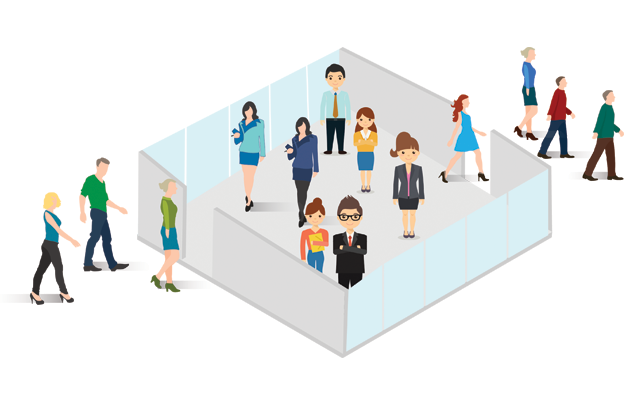

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/datasets/data/ML Linear regression dataset/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
x = df[['tenure','MonthlyCharges']]
y = df['Churn']
x

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


## <b> Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 2)
(1409, 2)
(5634,)
(1409,)


In [ ]:
y_train.value_counts()

,count
Churn,
0,4139
1,1495


In [ ]:
y_test.value_counts()

,count
Churn,
0,1035
1,374


## <b>Fitting logistic regression on train data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
train_pre = model.predict(x_train)
test_pre = model.predict(x_test)

In [ ]:
train_pre[-5:]

array([0, 0, 1, 0, 0])

In [ ]:
y_train[-5:]

,Churn
6303,0
6227,1
4673,1
2710,0
5639,0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
train_pre = model.predict(x_train)
test_pre = model.predict(x_test)
print(f'Train Accuracy: {accuracy_score(y_train,train_pre)}')
print(f'Train Precision: {precision_score(y_train,train_pre)}')
print(f'Train Recall: {recall_score(y_train,train_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_train,train_pre)}')
print(' ')
print('*'*80)
print(' ')
print(f'Test Accuracy: {accuracy_score(y_test,test_pre)}')
print(f'Test Precision: {precision_score(y_test,test_pre)}')
print(f'Test Recall: {recall_score(y_test,test_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_test,test_pre)}')

Train Accuracy: 0.7868299609513667
Train Precision: 0.6402671755725191
Train Recall: 0.4488294314381271
Test Confusion Matrix: 
[[3762  377]
 [ 824  671]]
 
********************************************************************************
 
Test Accuracy: 0.7735982966643009
Test Precision: 0.6045627376425855
Test Recall: 0.42513368983957217
Test Confusion Matrix: 
[[931 104]
 [215 159]]


#<b> <u>Learning about the confusion matrix

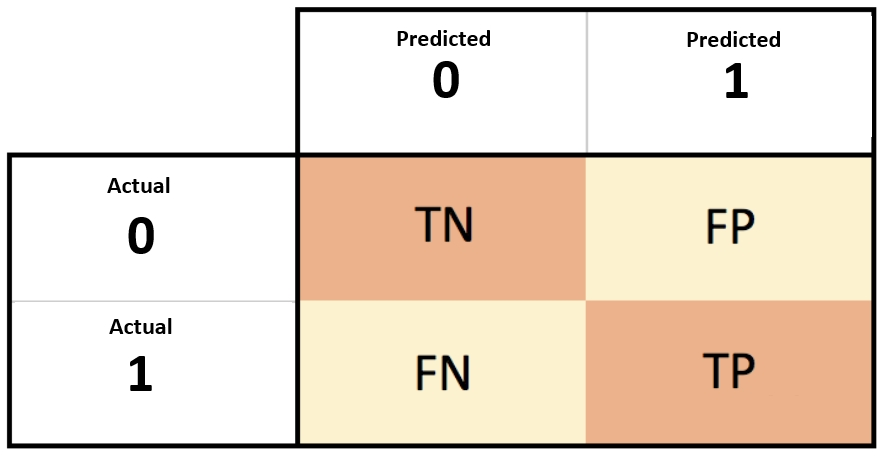

## <b><u>Implementing Cross-validated Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
model = LogisticRegressionCV(cv=100,scoring='accuracy')
model.fit(x_train,y_train)

LogisticRegressionCV(cv=100, scoring='accuracy')

In [ ]:
train_pre = model.predict(x_train)
test_pre = model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train,train_pre)}')
print(f'Train Precision: {precision_score(y_train,train_pre)}')
print(f'Train Recall: {recall_score(y_train,train_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_train,train_pre)}')
print(' ')
print('*'*80)
print(' ')
print(f'Test Accuracy: {accuracy_score(y_test,test_pre)}')
print(f'Test Precision: {precision_score(y_test,test_pre)}')
print(f'Test Recall: {recall_score(y_test,test_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_test,test_pre)}')

Train Accuracy: 0.7887823926162584
Train Precision: 0.6487804878048781
Train Recall: 0.44481605351170567
Test Confusion Matrix: 
[[3779  360]
 [ 830  665]]
 
********************************************************************************
 
Test Accuracy: 0.7750177430801988
Test Precision: 0.611764705882353
Test Recall: 0.41711229946524064
Test Confusion Matrix: 
[[936  99]
 [218 156]]


## <b><u>Scaling

In [ ]:
x

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegressionCV(cv=100,scoring='accuracy')
model.fit(x_train,y_train)

LogisticRegressionCV(cv=100, scoring='accuracy')

In [ ]:
train_pre = model.predict(x_train)
test_pre = model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train,train_pre)}')
print(f'Train Precision: {precision_score(y_train,train_pre)}')
print(f'Train Recall: {recall_score(y_train,train_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_train,train_pre)}')
print(' ')
print('*'*80)
print(' ')
print(f'Test Accuracy: {accuracy_score(y_test,test_pre)}')
print(f'Test Precision: {precision_score(y_test,test_pre)}')
print(f'Test Recall: {recall_score(y_test,test_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_test,test_pre)}')

Train Accuracy: 0.7896698615548455
Train Precision: 0.6534653465346535
Train Recall: 0.4414715719063545
Test Confusion Matrix: 
[[3789  350]
 [ 835  660]]
 
********************************************************************************
 
Test Accuracy: 0.7735982966643009
Test Precision: 0.6095617529880478
Test Recall: 0.4090909090909091
Test Confusion Matrix: 
[[937  98]
 [221 153]]


In [ ]:
a = (1,2,3)
print(a)

(1, 2, 3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_pre = model.predict(x_train)
test_pre = model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train,train_pre)}')
print(f'Train Precision: {precision_score(y_train,train_pre)}')
print(f'Train Recall: {recall_score(y_train,train_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_train,train_pre)}')
print(' ')
print('*'*80)
print(' ')
print(f'Test Accuracy: {accuracy_score(y_test,test_pre)}')
print(f'Test Precision: {precision_score(y_test,test_pre)}')
print(f'Test Recall: {recall_score(y_test,test_pre)}')
print(f'Test Confusion Matrix: \n{confusion_matrix(y_test,test_pre)}')

Train Accuracy: 0.9795882144124956
Train Precision: 0.9637096774193549
Train Recall: 0.9591973244147157
Test Confusion Matrix: 
[[4085   54]
 [  61 1434]]
 
********************************************************************************
 
Test Accuracy: 0.7366926898509581
Test Precision: 0.5045871559633027
Test Recall: 0.4411764705882353
Test Confusion Matrix: 
[[873 162]
 [209 165]]
